In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset from
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Stroke (also called brain attack) is second leading cause of death, according to WHO. Every 40 seconds, someone in the United States has a stroke. 

Dataset contains information whether patient had stroke, and their health conditions parameters like BMI or age. Each row represents state of one patient. Dataset is meant to predict stroke. 

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.xls')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
df.select_dtypes(include='object').describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## Data Cleaning

In [7]:
df.columns = df.columns.str.capitalize().str.replace('_',' ').values

In [8]:
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart disease', 'Ever married',
       'Work type', 'Residence type', 'Avg glucose level', 'Bmi',
       'Smoking status', 'Stroke'],
      dtype='object')

In [9]:
df = df.drop('Id', axis=1)

**Duplicates**

In [10]:
df.duplicated().sum()

0

**Dealing with Missing Values**

In [11]:
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
Heart disease          0
Ever married           0
Work type              0
Residence type         0
Avg glucose level      0
Bmi                  201
Smoking status         0
Stroke                 0
dtype: int64

In [12]:
#  Percentage of missing values in columns 'bmi'
df['Bmi'].isnull().sum()/len(df['Bmi'])*100

3.9334637964774952

In [13]:
# Since there is only 3,9% of rows with missing value in columns 'Bmi' I decided to drop these rows, which won't be a significat
# loss of information
df = df.dropna(axis=0, subset=['Bmi'])

In [14]:
df.shape

(4909, 11)

In [15]:
df.isnull().sum()

Gender               0
Age                  0
Hypertension         0
Heart disease        0
Ever married         0
Work type            0
Residence type       0
Avg glucose level    0
Bmi                  0
Smoking status       0
Stroke               0
dtype: int64

In [16]:
df.index = range(0,len(df))

**Categorical values analysis**

In [17]:
print(df.select_dtypes(include=['object']).columns)
length_c = len(df.select_dtypes(include=['object']).columns)
print(f'There is {length_c} numerical columns in that dataset')

Index(['Gender', 'Ever married', 'Work type', 'Residence type',
       'Smoking status'],
      dtype='object')
There is 5 numerical columns in that dataset


In [18]:
df['Gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: Gender, dtype: int64

I totally respects all gender preference, but there is only one instance of 'Other' in columns gender so I decided to drop that row, because it may create an additional noise, which may negatively affect the model. 🌈  
 

In [19]:
df = df[df['Gender'].isin(['Female','Male'])]

In [20]:
df['Ever married'].value_counts()

Yes    3204
No     1704
Name: Ever married, dtype: int64

In [21]:
df['Work type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: Work type, dtype: int64

In [22]:
df[df['Work type'] == 'Never_worked']['Age'].value_counts()

17.0    5
16.0    4
14.0    3
13.0    3
18.0    3
15.0    2
23.0    1
19.0    1
Name: Age, dtype: int64

Almost all of instances of 'Never worked' are related to underage. There are a few instances of 18, 19 and 23 year old, so having a separate group 'Children' I decided to join a group 'Never worked' to 'Children'.

In [23]:
df['Work type'] = df['Work type'].replace('Never_worked','children')

In [24]:
df['Work type'] = df['Work type'].replace(['children','Govt_job'],['Children','Government job'])

In [25]:
df['Residence type'].value_counts()

Urban    2490
Rural    2418
Name: Residence type, dtype: int64

In [26]:
df['Smoking status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: Smoking status, dtype: int64

There is a significant amount of instances of 'Unknown' in column 'Smoking status', so I'll treat it as a separate group.

In [27]:
df['Smoking status'] = df['Smoking status'].str.capitalize()

In [28]:
print(df.select_dtypes(include=['int64','float']).columns)
length_n = len(df.select_dtypes(include=['int64','float']).columns)
print(f'There is {length_n} numerical columns in that dataset')

Index(['Age', 'Hypertension', 'Heart disease', 'Avg glucose level', 'Bmi',
       'Stroke'],
      dtype='object')
There is 6 numerical columns in that dataset


## Exploratory data analysis ##

**Dependent Variable - Label**

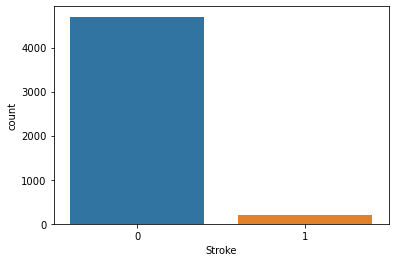

In [29]:
sns.countplot(data=df, x='Stroke');

Dataset is clearly imbalanced, which may cause some problems later on, while trying to build a model.

**Continuous Variables**

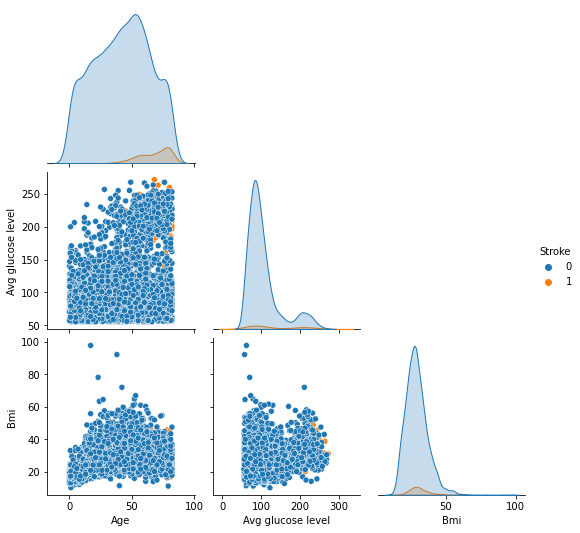

In [30]:
sns.pairplot(df[['Age', 'Avg glucose level', 'Bmi','Stroke']], hue='Stroke', corner=True);

There are three apparent outliers in terms of BMI, that may affect model negatively, so I decided remove these rows from the dataset.

In [31]:
df = df[df['Bmi'] <= 75]

In [32]:
df.shape

(4905, 11)

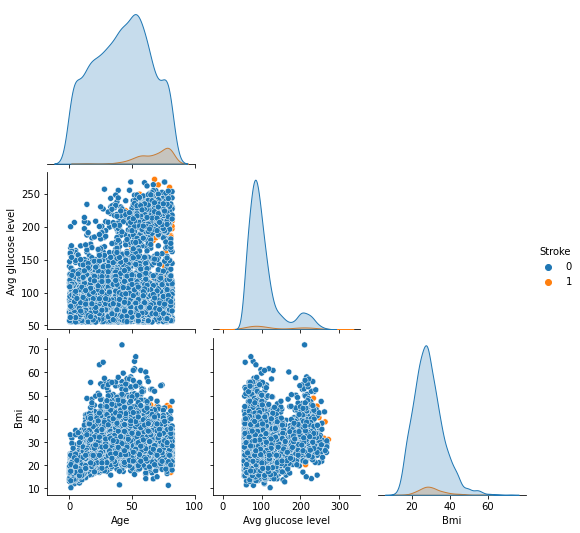

In [33]:
sns.pairplot(df[['Age', 'Avg glucose level', 'Bmi','Stroke']], hue='Stroke', corner=True)

Conclusions:

It may be observed that elderly people, that have higher average glucose level or higher BMI value are more likely to get stroke. 
Combination of higher average glucose level or higher BMI also make strokes more likely to occur.

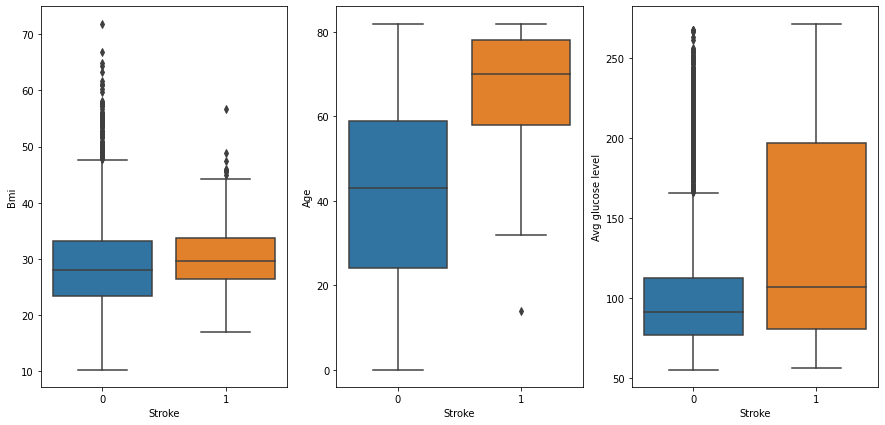

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
sns.boxplot(data=df, x='Stroke', y='Bmi', ax=axes[0])
sns.boxplot(data=df, x='Stroke', y='Age', ax=axes[1])
sns.boxplot(data=df, x='Stroke', y='Avg glucose level', ax=axes[2]);

Conclusions:


BMI Median of people that got stroke is a bit higher then people that hadn't got stroke, but difference is really slight.
Older patients are clearly more susceptible to stroke. 
Patients with higher average glucose level are more likely to get stroke. 

**Categorical variable**

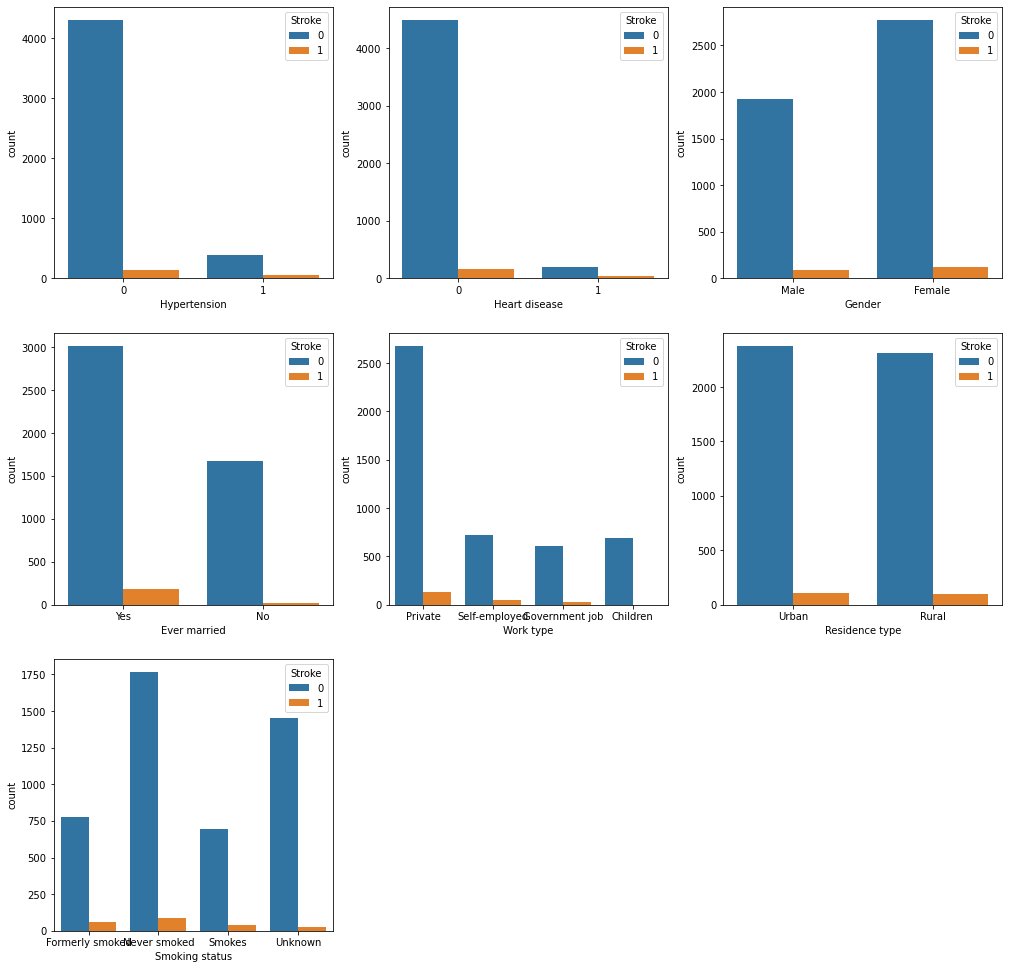

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,17))
fig.delaxes( ax=axes[2,1])
fig.delaxes( ax=axes[2,2])
sns.countplot(data=df, x='Hypertension', hue='Stroke', ax=axes[0][0])
sns.countplot(data=df, x='Heart disease', hue='Stroke', ax=axes[0][1])
sns.countplot(data=df, x='Gender', hue='Stroke', ax=axes[0][2])
sns.countplot(data=df, x='Ever married', hue='Stroke', ax=axes[1][0])
sns.countplot(data=df, x='Work type', hue='Stroke', ax=axes[1][1])
sns.countplot(data=df, x='Residence type', hue='Stroke', ax=axes[1][2])
sns.countplot(data=df, x='Smoking status', hue='Stroke', ax=axes[2][0]);

**Categorical columns - One hot encoding**

In [36]:
df = pd.get_dummies(df, drop_first=True)

In [37]:
df.head()

,Age,Hypertension,Heart disease,Avg glucose level,Bmi,Stroke,Gender_Male,Ever married_Yes,Work type_Government job,Work type_Private,Work type_Self-employed,Residence type_Urban,Smoking status_Never smoked,Smoking status_Smokes,Smoking status_Unknown
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,1,0,0,0
1,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,1,0,0
2,49.0,0,0,171.23,34.4,1,0,1,0,1,0,1,0,1,0
3,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,1,0,0
4,81.0,0,0,186.21,29.0,1,1,1,0,1,0,1,0,0,0


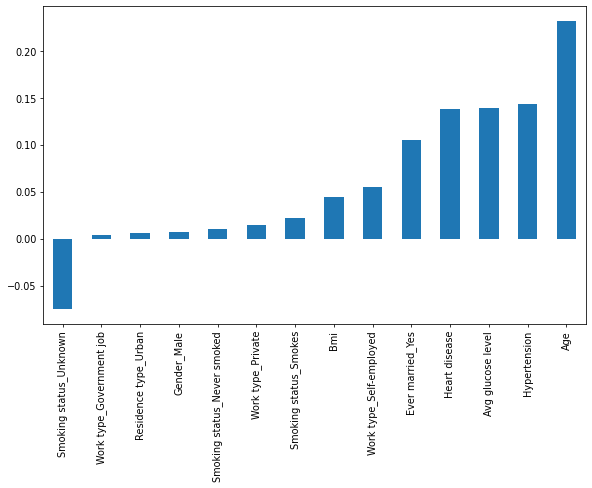

In [38]:
plt.figure(figsize=(10,6), dpi=70)
df_without_stroke = df.drop('Stroke', axis=1)
df_without_stroke.corrwith(df['Stroke']).sort_values().plot(kind='bar');

<AxesSubplot:>

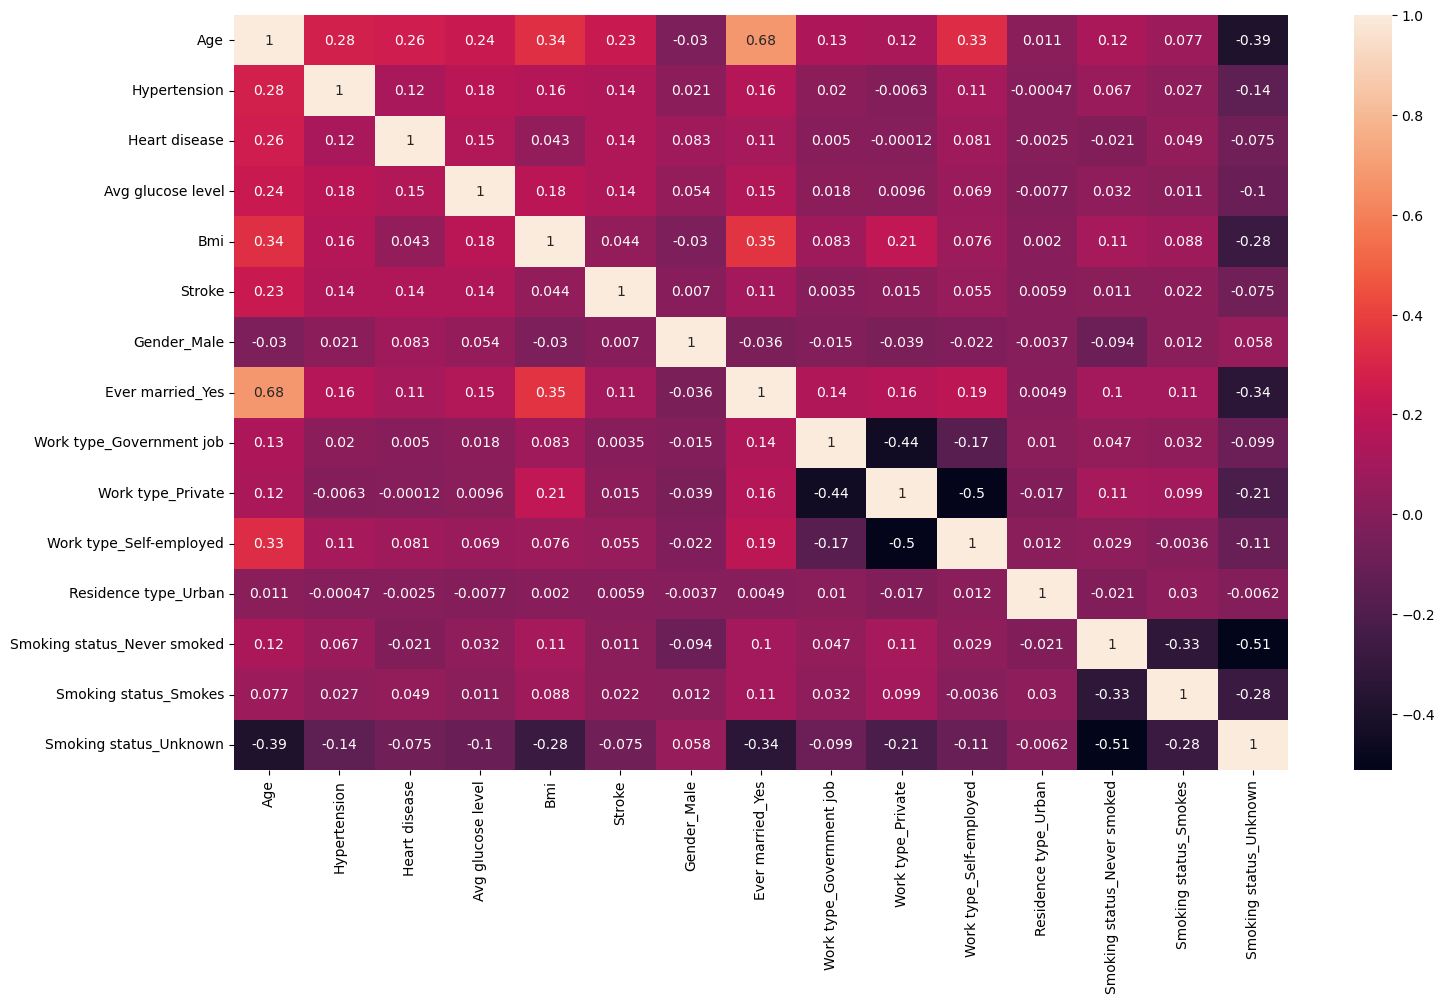

In [39]:
plt.figure(figsize=(17,10), dpi=100)
sns.heatmap(df.corr(), annot=True)

## Creating a model

Splitting data

In [40]:
X = df.drop('Stroke', axis=1)
y = df['Stroke']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scaling data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
model_logistic_reg = LogisticRegression()
model_logistic_reg.fit(X_train, y_train);

In [44]:
pred_logistic_reg = model_logistic_reg.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_roc_curve, confusion_matrix, classification_report

In [46]:
print('Accuracy score: ', round(accuracy_score(y_test,pred_logistic_reg)*100,2), '%')
print('Recall score: ', round(recall_score(y_test,pred_logistic_reg)*100,2), '%')
print('Precision score: ', round(precision_score(y_test,pred_logistic_reg)*100,2), '%')

Accuracy score:  95.62 %
Recall score:  0.0 %
Precision score:  0.0 %


C:\Users\katar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(confusion_matrix(y_test, pred_logistic_reg))
print(classification_report(y_test, pred_logistic_reg))

[[938   0]
 [ 43   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       938
           1       0.00      0.00      0.00        43

    accuracy                           0.96       981
   macro avg       0.48      0.50      0.49       981
weighted avg       0.91      0.96      0.93       981



C:\Users\katar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\katar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


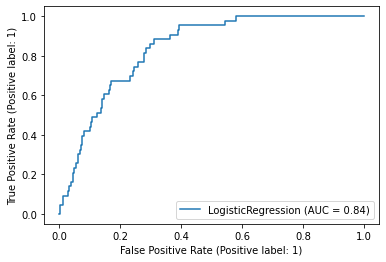

In [48]:
plot_roc_curve(model_logistic_reg, X_test, y_test);

Althought accuracy score is really high - 96%, dependent variable is highly imbalanced, which makes that score not representative. I this case we should rely more on recall and precision scores, which are equal to zero - Logistic Regression Model classifies all cases all not-Stroke, what makes the model completely useless.  

**KNeighbors Classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train);

In [50]:
pred_kn = model_kn.predict(X_test)

In [51]:
print('Accuracy score: ', round(accuracy_score(y_test,pred_kn)*100,2), '%')
print('Recall score: ', round(recall_score(y_test,pred_kn)*100,2), '%')
print('Precision score: ', round(precision_score(y_test,pred_kn)*100,2), '%')

Accuracy score:  95.51 %
Recall score:  0.0 %
Precision score:  0.0 %


C:\Users\katar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


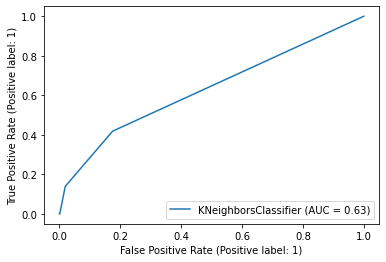

In [52]:
plot_roc_curve(model_kn, X_test, y_test);

Not only all recall and precise scores are equal to zero, but also ROC curve and AUC=0,63 (which is pretty close to zero) imply that it's almost random guess.

**XGBClassifier**

In [53]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train);

In [54]:
pred_xgb = model_xgb.predict(X_test)

In [55]:
print('Accuracy score: ', round(accuracy_score(y_test,pred_xgb)*100,2), '%')
print('Recall score: ', round(recall_score(y_test,pred_xgb)*100,2), '%')
print('Precision score: ', round(precision_score(y_test,pred_xgb)*100,2), '%')

Accuracy score:  95.62 %
Recall score:  4.65 %
Precision score:  50.0 %


C:\Users\katar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


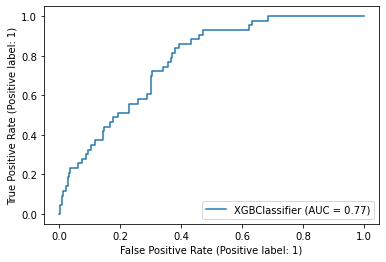

In [56]:
plot_roc_curve(model_xgb, X_test, y_test);

XGBClassifier resulted in the best scores so far. But still recall score=4,65 and precision score = 50 are rather implies weak model. In the next step I'll try to tune hyperparamethers in XBGClassifier using GridSearchCV 

**XGBClassifier - hyperparameters tuning**

In [57]:
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.2]
max_depth = [2, 3, 5]
n_estimators = [100, 500, 1100, 1500]


hyperparameter_grid = {
    'booster':booster,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'n_estimators': n_estimators
    }


In [58]:
from sklearn.model_selection import GridSearchCV
model_gridCV = GridSearchCV(estimator=model_xgb, param_grid=hyperparameter_grid, cv=5, n_jobs=-1, scoring='recall')

In [59]:
model_gridCV.fit(X_train, y_train);

In [61]:
pred_gridCV = model_gridCV.predict(X_test)

In [62]:
print('Accuracy score: ', round(accuracy_score(y_test,pred_gridCV)*100,2), '%')
print('Recall score: ', round(recall_score(y_test,pred_gridCV)*100,2), '%')
print('Precision score: ', round(precision_score(y_test,pred_gridCV)*100,2), '%')

Accuracy score:  95.51 %
Recall score:  9.3 %
Precision score:  44.44 %


Tuning hyperparamethers didn't resulted in better scores, which may suggest that dataset is too imbalanced. It that case SMOTE will be implemented to oversample the minority class (instances of stroke).

**SMOTE - over-sampling data**

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smote = SMOTE(random_state=0)
X2 , y2 = smote.fit_resample(X,y)

In [67]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [69]:
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.2]
max_depth = [2, 3, 5]
n_estimators = [100, 500, 1100, 1500]


hyperparameter_grid_smote = {
    'booster':booster,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'n_estimators': n_estimators
    }

In [70]:
model_xgb_smote = XGBClassifier()

In [71]:
from sklearn.model_selection import GridSearchCV
model_gridCV_smote = GridSearchCV(model_xgb_smote, hyperparameter_grid_smote, scoring = 'roc_auc' ,cv=5)
model_gridCV_smote.fit(X_train2, y_train2)

[17:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[17:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 500, 1100, 1500]},
             scoring='roc_auc')

In [72]:
pred_gridCV_smote  = model_gridCV_smote.predict(X_test2)
print('Accuracy score: ', round(accuracy_score(y_test2,pred_gridCV_smote)*100,2), '%')
print('Recall score: ', round(recall_score(y_test2,pred_gridCV_smote)*100,2), '%')
print('Precision score: ', round(precision_score(y_test2,pred_gridCV_smote)*100,2), '%')

Accuracy score:  96.7 %
Recall score:  96.71 %
Precision score:  96.71 %


C:\Users\katar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


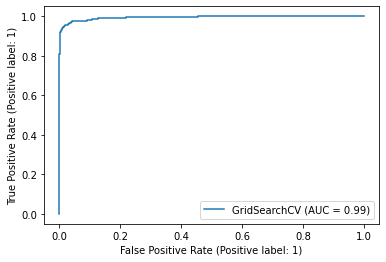

In [73]:
plot_roc_curve(model_gridCV_smote, X_test2, y_test2);

In [74]:
model_gridCV_smote.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1500,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# Final model #

In [75]:
final_model = XGBClassifier(booster='gbtree',learning_rate=0.05, max_depth=5, max_leaves=0, 
                            min_child_weight=1, n_estimators=1500,)
final_model.fit(X_train2, y_train2);

In [76]:
pred_final  = final_model.predict(X_test2)

In [77]:
print('Accuracy score: ', round(accuracy_score(y_test2,pred_final)*100,2), '%')
print('Recall score: ', round(recall_score(y_test2,pred_final)*100,2), '%')
print('Precision score: ', round(precision_score(y_test2,pred_final)*100,2), '%')

Accuracy score:  96.7 %
Recall score:  96.71 %
Precision score:  96.71 %


For my final model I decided to use XGBClassifier, since it gave the best results even before using smote library. Over-sampling data was necessery, otherwise models' scores were not satisfying. Not also accuracy score is high, but also precision score and recall score have high values. Recall score is particulary important in this case, because when predicting a possibility of getting stroke, it's better to overcautious.